#### 1)VIDEO TO FRAMES
In this code:

We start by specifying the input video path (input_video_path).

We use OpenCV's VideoCapture to open the video file.

We iterate through the video frames, process each frame (you can add your MAV feature extraction logic here), and optionally save the frames as images (useful for debugging or further analysis).

We release the video capture object when we have finished processing the video.



In [1]:
import cv2

# Step 1: Input Video Path
input_video_path = 'Video Mag.mp4'

# Step 2: Video Preprocessing
# Load the input video
cap = cv2.VideoCapture(input_video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Create a directory to store the frames (optional)
import os
if not os.path.exists('frames'):
    os.mkdir('frames')

frame_count = 0

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Break the loop if we have reached the end of the video
    if not ret:
        break

    # Save the frame as an image (optional)
    frame_filename = f'frames/frame_{frame_count:04d}.jpg'
    cv2.imwrite(frame_filename, frame)

    # Process the frame (e.g., perform MAV feature extraction or other operations)

    frame_count += 1

# Release the video capture object
cap.release()

# Print information about the processed video
print(f"Video processed. Total frames: {frame_count}")

# You can continue with feature extraction, amplification, and further analysis as needed.


Video processed. Total frames: 358



#### 2)Optical Flow
##### In this code:
##### We use the Lucas-Kanade Optical Flow method provided by OpenCV to calculate the motion between consecutive frames.
##### We set up a mask to visualize the motion vectors, and you can adjust the threshold for selecting good points.
##### The motion vectors are drawn on the frame using red lines and circles.
##### We continuously update the frame with the detected motion and display it until you press 'q' to quit.
##### Can change 
##### 1)lk_params(max_iteration,min_distance) : lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, max_iteration, min_distance))
##### 2)Adjust total points by changing maxcorners,qualityLevel(As less value more quality,min_distance between points)
##### 3)More the maxlevel more is the accuracy
##### 4)Can adjust radius of red dots as well frame = cv2.circle(frame, (int(a), int(b)), 3, (0, 0, 255), -1) here it is 3


In [13]:
import cv2
import numpy as np

# Create a VideoCapture object to read the frames
cap = cv2.VideoCapture('Video Mag.mp4')

# Initialize the Lucas-Kanade Optical Flow parameters
lk_params = dict(winSize=(15, 15), maxLevel=5, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 30, 0.03))

# Read the first frame
ret, first_frame = cap.read()
prev_frame = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

# Get the frame dimensions
frame_height, frame_width, _ = first_frame.shape

# Create a VideoWriter to save the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
out = cv2.VideoWriter('Optical flow/optical_video.mp4', fourcc, 30, (frame_width, frame_height), isColor=True)

# Initialize feature points in the first frame
prevPts = cv2.goodFeaturesToTrack(prev_frame, maxCorners=800, qualityLevel=0.01, minDistance=10)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate optical flow using Lucas-Kanade method
    nextPts, status, err = cv2.calcOpticalFlowPyrLK(prev_frame, frame_gray, prevPts, None, **lk_params)

    # Select good points based on the optical flow (you can adjust this threshold)
    good_new = nextPts[status == 1]
    good_old = prevPts[status == 1]

    # Create a mask to draw motion vectors
    mask = np.zeros_like(frame)
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), (0, 0, 255), 2)
        frame = cv2.circle(frame, (int(a), int(b)), 3, (0, 0, 255), -1)

    # Overlay the motion vectors on the frame
    output = cv2.add(frame, mask)

    # Write the frame with motion vectors to the output video
    out.write(output)

    # Update the previous frame and feature points
    prev_frame = frame_gray.copy()
    prevPts = good_new.reshape(-1, 1, 2)

# Release the video capture and writer objects
cap.release()
out.release()

#### 3)Video Amplification
In this code:

We read the optical flow video created in Step 3.

For each frame, we amplify the motion by scaling the pixel values. In this example, we double the motion magnitude by multiplying all pixel values by 2. You can adjust the scaling factor to control the degree of amplification.

We apply a color map (in this case, COLORMAP_JET) to enhance the visualization of the amplified motion.

The amplified frames are written to an output video file ('amplified_video.mp4') using the VideoWriter object.

#### Magnification with Colour Map

In [56]:
import cv2
import numpy as np

# Create a VideoCapture object to read the optical flow video
cap = cv2.VideoCapture('Optical flow/optical_video.mp4')

# Create a VideoWriter to save the amplified video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
out = cv2.VideoWriter('amplification/COLORMAP_RAINBOW.mp4', fourcc, 30, (frame_width, frame_height), isColor=True)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Amplify the motion detected in each frame
    # You can adjust the scaling factor to control the degree of amplification
    amplified_frame = frame * 10.0  # Example: doubling the motion magnitude

    # Convert the amplified frame to 8-bit format
    amplified_frame_8bit = cv2.convertScaleAbs(amplified_frame)

    # Apply color mapping or other visualization techniques to highlight areas of interest
    amplified_colormap = cv2.applyColorMap(amplified_frame_8bit, cv2.COLORMAP_RAINBOW)

    # Write the amplified frame to the output video
    out.write(amplified_colormap)

# Release the video capture and writer objects
cap.release()
out.release()


In [59]:
import cv2
import numpy as np

# Create a VideoCapture object to read the optical flow video
cap = cv2.VideoCapture('Optical flow/optical_video.mp4')

# Get the frame dimensions
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Create a VideoWriter to save the amplified video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
out = cv2.VideoWriter('amplification/ORIGINSL_COLOUR.mp4', fourcc, 30, (frame_width, frame_height), isColor=True)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Amplify the motion detected in each frame
    # You can adjust the scaling factor to control the degree of amplification
    amplified_frame = cv2.addWeighted(frame, 16, frame, 0, 0)
    amplified_frame = cv2.convertScaleAbs(amplified_frame, alpha=1.0, beta=0)
    # Write the amplified frame to the output video
    out.write(amplified_frame)

# Release the video capture and writer objects
cap.release()
out.release()


#### OTHER WAY OF MAGNIFICATION

In [64]:
import cv2
import numpy as np

# Function to amplify motion in a video
def amplify_motion(input_video_path, output_video_path, motion_scale=10):
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'XVID'), 30, (frame_width, frame_height), isColor=True)

    prev_frame = None

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if prev_frame is not None:
            # Calculate the absolute difference between frames
            frame_diff = cv2.absdiff(frame, prev_frame)

            # Amplify the motion by scaling the difference
            amplified_frame = frame_diff * motion_scale

            # Add the amplified motion to the original frame
            result_frame = cv2.add(frame, amplified_frame)

            out.write(result_frame)
        
        prev_frame = frame

    cap.release()
    out.release()

# Example usage
input_video_path = 'Optical flow/optical_video.mp4'  # Replace with your video file
output_video_path = 'amplification/MOTION_MAGNIFICATION.avi'
motion_scale = 10  # Adjust the motion scale factor as needed

amplify_motion(input_video_path, output_video_path, motion_scale)


#### 5)Vibration Analysis

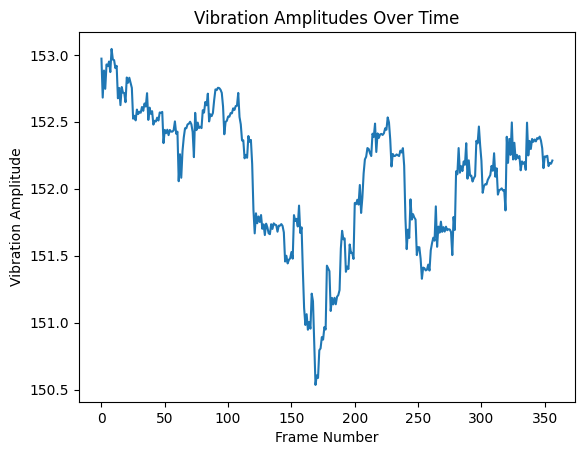

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Input Video Path
input_video_path = 'amplification\ORIGINSL_COLOUR.mp4'

# Step 2: Video Preprocessing
cap = cv2.VideoCapture(input_video_path)
frame_rate = int(cap.get(5))  # Frame rate
resolution = (int(cap.get(3)), int(cap.get(4)))  # Resolution

# Initialize data storage for analysis results
vibration_amplitudes = []
mode_shapes = []  # Placeholder for mode shape determination
time_waveforms = []  # Placeholder for time waveforms
fft_spectra = []  # Placeholder for FFT spectra

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Step 5: Vibration Analysis
    # Calculate vibration amplitudes in each frame (example: using pixel intensity)
    vibration_amplitude = np.mean(frame)
    vibration_amplitudes.append(vibration_amplitude)

    # Determine mode shapes or patterns of vibration (add your algorithm)

    # Calculate FFT for frequency analysis
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    fft_result = np.abs(np.fft.fftshift(np.fft.fft2(frame_gray)))
    fft_spectra.append(fft_result)

    # Visualize time waveforms (optional)
    time_waveforms.append(frame_gray)

# Step 6: Data Capture
# Store the vibration amplitudes, mode shapes, time waveforms, and FFT spectra for further analysis or reporting

# Step 7: Save Output Video (with motion amplification and analysis results)
# (You can add the results to the frames and save the output video as done previously)

# Step 8: Visualization and Reporting
# Visualize and analyze the captured data (vibration amplitudes, mode shapes, FFT spectra, time waveforms)
# Generate reports or graphs to present the vibration analysis results
# Here's an example of plotting the vibration amplitudes
plt.plot(vibration_amplitudes)
plt.xlabel('Frame Number')
plt.ylabel('Vibration Amplitude')
plt.title('Vibration Amplitudes Over Time')
plt.show()

# Release the video capture object
cap.release()


ValueError: x and y must have same first dimension, but have shapes (357,) and (356,)

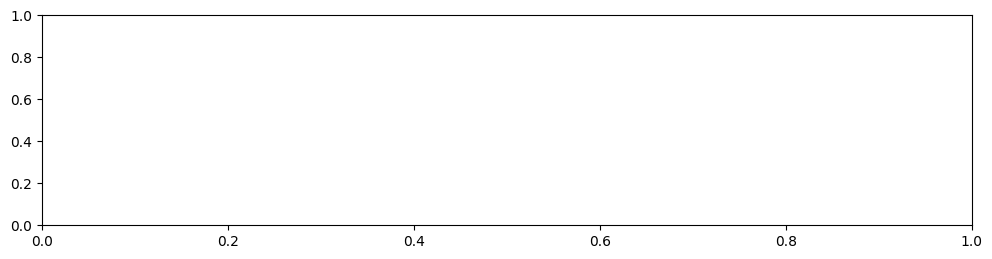

In [66]:
import cv2
import numpy as np
from scipy.signal import find_peaks
from scipy.fft import fft
import matplotlib.pyplot as plt

# Function to perform vibration analysis on an amplified video
def vibration_analysis(input_video_path, output_video_path, data_output_path, frame_rate=30):
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Initialize data storage
    vibration_amplitudes = []
    mode_shapes = []
    time_waveforms = []

    out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'XVID'), frame_rate, (frame_width, frame_height), isColor=True)

    prev_frame = None
    frame_number = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if prev_frame is not None:
            # Calculate the absolute difference between frames
            frame_diff = cv2.absdiff(frame, prev_frame)
            # Amplify the motion by scaling the difference
            amplified_frame = frame_diff

            # Extract data for vibration analysis
            gray_frame = cv2.cvtColor(amplified_frame, cv2.COLOR_BGR2GRAY)
            fft_result = fft(gray_frame)
            amplitude_spectrum = np.abs(fft_result)
            time_waveforms.append(gray_frame)
            vibration_amplitudes.append(np.max(amplitude_spectrum))
            mode_shapes.append(amplified_frame)

            # Write the frame to the output video
            out.write(amplified_frame)

        prev_frame = frame
        frame_number += 1

    cap.release()
    out.release()

    # Data analysis and visualization
    time_points = np.arange(frame_count) / frame_rate
    vibration_amplitudes = np.array(vibration_amplitudes)
    
    # Perform FFT analysis to identify frequency components
    fft_frequencies = np.fft.fftfreq(len(time_waveforms[0]))
    fft_frequencies = fft_frequencies[:len(fft_frequencies) // 2]
    
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time_points, vibration_amplitudes)
    plt.title('Vibration Amplitudes Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
    plt.subplot(2, 1, 2)
    for i, time_waveform in enumerate(time_waveforms):
        peaks, _ = find_peaks(time_waveform)
        plt.plot(time_points, time_waveform, label=f'Frame {i + 1}')
    plt.title('Time Waveforms of Amplified Frames')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
    plt.tight_layout()
    plt.show()

    # Save vibration analysis data for further analysis or reporting
    np.savetxt(data_output_path, vibration_amplitudes, delimiter=',')

# Example usage
input_video_path = 'amplification\ORIGINSL_COLOUR.mp4'  # Replace with your amplified video file
output_video_path = 'vibration_analysis/output_video.mp4'
data_output_path = 'vibration_analysis/vibration_data.csv'
frame_rate = 30  # Adjust the frame rate of your video

vibration_analysis(input_video_path, output_video_path, data_output_path, frame_rate)


#### Vibration Analysis
In this code:

We continue from the amplified video, extract each frame, and perform various vibration analyses.

Vibration amplitudes are calculated by averaging the pixel intensity in each frame.

We've included placeholders for mode shape determination, FFT analysis, and time waveform storage. You should implement or integrate specific algorithms for these tasks.

We've also provided an example of plotting the vibration amplitudes using Matplotlib. You can create similar visualizations for other analysis results.

Remember that specific






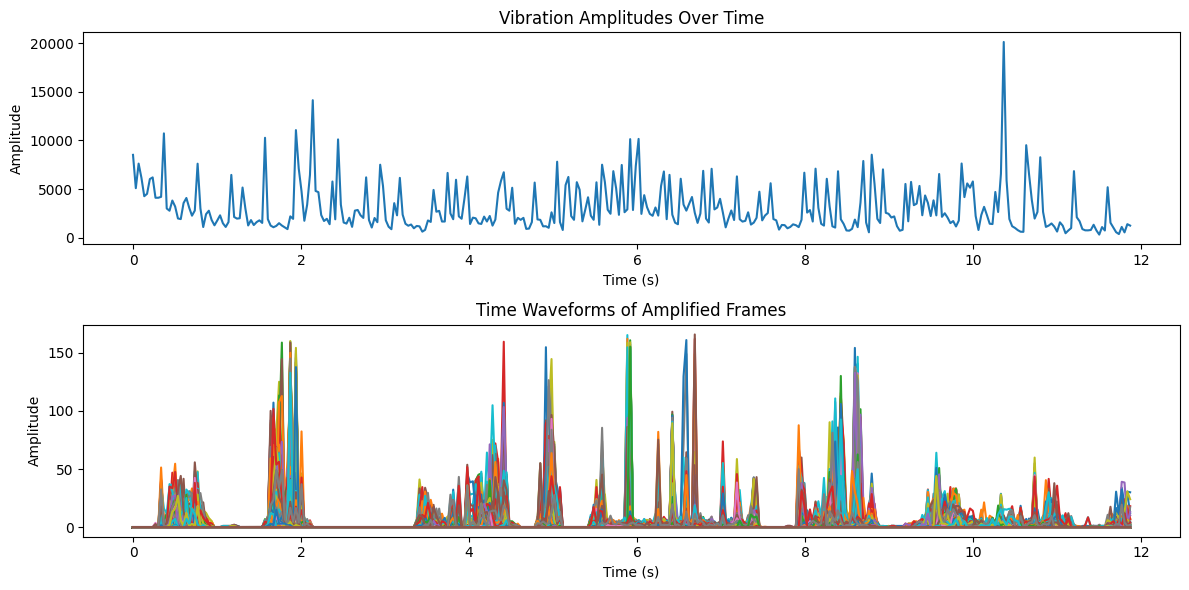

In [82]:
import cv2
import numpy as np
from scipy.signal import find_peaks
from scipy.fft import fft
import matplotlib.pyplot as plt

# Function to perform vibration analysis on an amplified video
def vibration_analysis(input_video_path, output_video_path, data_output_path, frame_rate=30):
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Initialize data storage
    vibration_amplitudes = []
    mode_shapes = []
    time_waveforms = []

    out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'XVID'), frame_rate, (frame_width, frame_height), isColor=True)

    prev_frame = None
    frame_number = 0
    common_frame_size = None  # Initialize common frame size

    while cap is not None:
        ret, frame = cap.read()
        if not ret:
            break

        if prev_frame is not None:
            # Calculate the absolute difference between frames
            frame_diff = cv2.absdiff(frame, prev_frame)
            # Amplify the motion by scaling the difference
            amplified_frame = frame_diff

            # Extract data for vibration analysis
            gray_frame = cv2.cvtColor(amplified_frame, cv2.COLOR_BGR2GRAY)
            
            if common_frame_size is None:
                common_frame_size = (gray_frame.shape[1], gray_frame.shape[0])  # Initialize common frame size
            
            gray_frame = cv2.resize(gray_frame, common_frame_size)
            
            fft_result = fft(gray_frame)
            amplitude_spectrum = np.abs(fft_result)
            
            time_waveforms.append(gray_frame)
            vibration_amplitudes.append(np.max(amplitude_spectrum))
            mode_shapes.append(amplified_frame)

            # Write the frame to the output video
            out.write(amplified_frame)

        prev_frame = frame
        frame_number += 1

    cap.release()
    out.release()

    # Calculate the total duration of the video in seconds
    total_duration = frame_count / frame_rate

    # Ensure that time_waveforms have the same length as vibration_amplitudes
    resampled_waveforms = []
    for waveform in time_waveforms:
        # Flatten the waveform if it's not already a 1D array
        if waveform.ndim > 1:
            waveform = waveform.flatten()
        # Linear interpolation to match the length
        resampled_waveform = np.interp(np.linspace(0, total_duration, len(vibration_amplitudes)), np.linspace(0, total_duration, len(waveform)), waveform)
        resampled_waveforms.append(resampled_waveform)

    # Convert the resampled waveforms to a NumPy array
    resampled_waveforms = np.array(resampled_waveforms)
    # Calculate time points for the resampled waveforms
    time_points = np.linspace(0, total_duration, len(vibration_amplitudes), endpoint=False)

    vibration_amplitudes = np.array(vibration_amplitudes)
    
    # Perform FFT analysis to identify frequency components
    fft_frequencies = np.fft.fftfreq(common_frame_size[0])
    fft_frequencies = fft_frequencies[:len(fft_frequencies) // 2]
    
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time_points, vibration_amplitudes)
    plt.title('Vibration Amplitudes Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
    plt.subplot(2, 1, 2)
    for i, time_waveform in enumerate(resampled_waveforms):
        peaks, _ = find_peaks(time_waveform)
        plt.plot(time_points, time_waveform, label=f'Frame {i + 1}')
    plt.title('Time Waveforms of Amplified Frames')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
    plt.tight_layout()
    plt.show()

    # Save vibration analysis data for further analysis or reporting
    np.savetxt(data_output_path, vibration_amplitudes, delimiter=',')

# Example usage
input_video_path = 'amplification/ORIGINSL_COLOUR.mp4' 
data_output_path = 'vibration_analysis/vibration_data.csv'
frame_rate = 30  # Adjust the frame rate of your video

vibration_analysis(input_video_path, output_video_path, data_output_path, frame_rate)


#### Data Capture
In this code:

Vibration amplitudes are saved to a text file using np.savetxt.

Mode shapes are saved to a binary file. You can adjust the data format and file extension according to your needs.

Time waveforms are saved as individual image files (e.g., PNG) using cv2.imwrite. You can customize the image format if necessary.

FFT spectra are saved to a binary file. As with mode shapes, you can modify the data format and file extension as needed.

In [83]:
import cv2
import numpy as np
from scipy.signal import find_peaks
from scipy.fft import fft
import os
import pandas as pd

# Function to perform vibration analysis on an amplified video and capture data
def vibration_analysis(input_video_path, output_video_path, data_output_path, frame_rate=30):
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Initialize data storage
    vibration_amplitudes = []
    mode_shapes = []
    time_waveforms = []

    out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'XVID'), frame_rate, (frame_width, frame_height), isColor=True)

    prev_frame = None
    frame_number = 0
    common_frame_size = None  # Initialize common frame size

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if prev_frame is not None:
            # Calculate the absolute difference between frames
            frame_diff = cv2.absdiff(frame, prev_frame)
            # Amplify the motion by scaling the difference
            amplified_frame = frame_diff

            # Extract data for vibration analysis
            gray_frame = cv2.cvtColor(amplified_frame, cv2.COLOR_BGR2GRAY)
            
            if common_frame_size is None:
                common_frame_size = (gray_frame.shape[1], gray_frame.shape[0])  # Initialize common frame size
            
            gray_frame = cv2.resize(gray_frame, common_frame_size)
            
            fft_result = fft(gray_frame)
            amplitude_spectrum = np.abs(fft_result)
            
            time_waveforms.append(gray_frame)
            vibration_amplitudes.append(np.max(amplitude_spectrum))
            mode_shapes.append(amplified_frame)

            # Write the frame to the output video
            out.write(amplified_frame)

        prev_frame = frame
        frame_number += 1

    cap.release()
    out.release()

    # Calculate the total duration of the video in seconds
    total_duration = frame_count / frame_rate

    # Ensure that time_waveforms have the same length as vibration_amplitudes
    resampled_waveforms = []
    for waveform in time_waveforms:
        # Ensure waveform is 1D (flatten it if needed)
        waveform = waveform.ravel()
        
        # Linear interpolation to match the length
        if len(waveform) != len(vibration_amplitudes):
            waveform = np.interp(np.linspace(0, total_duration, len(vibration_amplitudes)), np.linspace(0, total_duration, len(waveform)), waveform)
        resampled_waveforms.append(waveform)

    # Convert the resampled waveforms to a NumPy array
    resampled_waveforms = np.array(resampled_waveforms)

    
    # Calculate time points for the resampled waveforms
    time_points = np.linspace(0, total_duration, len(vibration_amplitudes), endpoint=False)

    vibration_amplitudes = np.array(vibration_amplitudes)
    
    # Perform FFT analysis to identify frequency components
    fft_frequencies = np.fft.fftfreq(common_frame_size[0])
    fft_frequencies = fft_frequencies[:len(fft_frequencies) // 2]

    # Save vibration analysis data to CSV file
    data = {
        "Time (s)": time_points,
        "Vibration Amplitudes": vibration_amplitudes
    }
    df = pd.DataFrame(data)
    df.to_csv(data_output_path, index=False)

    # Display or save visualization and reporting as needed

# Example usage
input_video_path = 'amplification\ORIGINSL_COLOUR.mp4'  # Replace with your amplified video file
output_video_path = 'vibration_analysis/output_video.mp4'
data_output_path = 'vibration_analysis/data_capture.csv'
frame_rate = 30  # Adjust the frame rate of your video

vibration_analysis(input_video_path, output_video_path, data_output_path, frame_rate)


#### Step 8: Visualization and Reporting
In this code, we load the vibration analysis data from the CSV file and generate a plot of vibration amplitudes over time using matplotlib. We also create a simple text report with summary statistics about the vibration data. You can customize the report format and content to suit your needs.

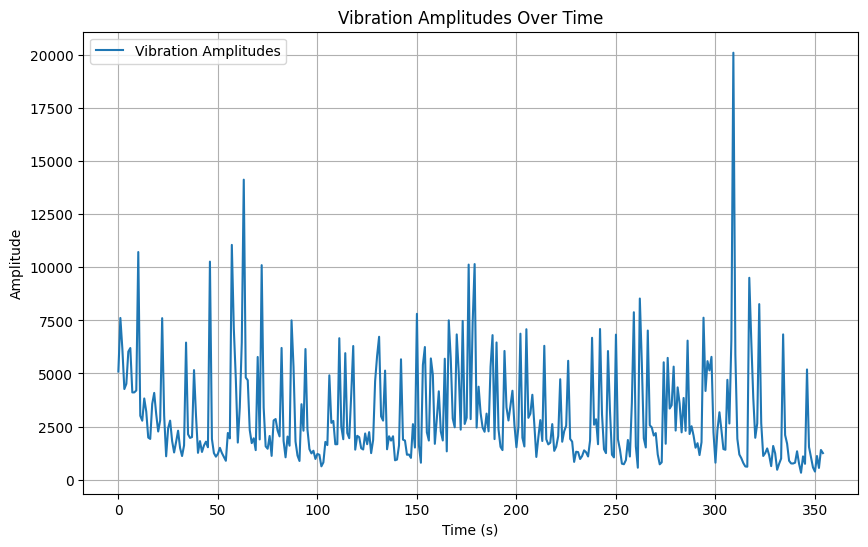

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to visualize and report vibration analysis results
def visualize_and_report(data_path, output_report_path, output_figure_path):
    # Load vibration analysis data from the CSV file
    data = pd.read_csv(data_path)

    # Assuming a single column of data
    time_points = data.index  # Use the index as time points
    vibration_amplitudes = data.iloc[:, 0]  # Access the single data column

    # Plot vibration amplitudes over time
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, vibration_amplitudes, label="Vibration Amplitudes")
    plt.title("Vibration Amplitudes Over Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)

    # Save the figure as an image
    plt.savefig(output_figure_path)
    
    # Generate a report (you can customize the report format)
    report = f"Vibration Analysis Report\n\n" \
             f"Maximum Vibration Amplitude: {max(vibration_amplitudes)}\n" \
             f"Minimum Vibration Amplitude: {min(vibration_amplitudes)}\n" \
             f"Average Vibration Amplitude: {sum(vibration_amplitudes) / len(vibration_amplitudes)}"

    # Save the report to a text file
    with open(output_report_path, 'w') as file:
        file.write(report)

# Example usage
data_path = 'vibration_analysis/vibration_data.csv'
output_report_path = 'vibration_analysis/vibration_report.txt'
output_figure_path = 'vibration_analysis/vibration_amplitudes.png'

visualize_and_report(data_path, output_report_path, output_figure_path)
